In [4]:
import cana
from cana.datasets.bio import DROSOPHILA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from copy import copy
%matplotlib inline

In [5]:
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from copy import copy

# both of these functions were copied verbatim from tutorial notebooks in the
# CANA git repo


def plot_schemata(nid, n, save=False):
    # Init values from BooleanNode
    k = n.k if n.k >= 1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    pi0s, pi1s = n._prime_implicants
    ts0s, ts1s = n._two_symbols
    # Count number of PI and TS
    n_pi = sum(len(pis) for pis in [pi0s, pi1s])
    n_ts = sum(len(tss) for tss in [ts0s, ts1s])
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 160, 25, 25, 60, 60
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_pi*(cwidth+cyspace)+sepcyspace-cyspace)
    ax2width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax2height = (n_ts*(cwidth+cyspace)+sepcyspace-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + ax2width + right)
    fheight = (bottom + max(ax1height, ax2height) + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax2w = ((ax2width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _ax2h = ((ax2height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi, fheight/dpi), dpi=dpi)
    ax1 = fig.add_axes((_left, _bottom, _ax1w, _ax1h), aspect=1, label='PI')
    ax2 = fig.add_axes((_left+_ax1w+_hs, _bottom, _ax2w,
                        _ax1h), aspect=1, label='TS')

    ### PI Plot ###

    yticks = []
    patches = []
    x, y = 0., 0.
    #
    for out, pis in zip([1, 0], [pi1s, pi0s]):
        for pi in pis:
            x = 0.
            xticks = []
            for input in pi:
                if input == '0':
                    facecolor = 'white'
                    textcolor = 'black'
                elif input == '1':
                    facecolor = 'black'
                    textcolor = 'white'
                elif input == '2':
                    facecolor = '#cccccc'
                    textcolor = 'black'
                text = '%s' % (input) if (input != '2') else '#'
                ax1.add_artist(Text(x+cwidth/2, y+cwidth/10*4, text=text, color=textcolor,
                                    va='center', ha='center', fontsize=14, family='serif'))
                r = Rectangle((x, y), width=cwidth, height=cwidth,
                              facecolor=facecolor, edgecolor='black')
                patches.append(r)
                xticks.append(x+cwidth/2)
                x += cwidth + cxspace

            x += sepcxspace
            r = Rectangle((x, y), width=cwidth, height=cwidth, facecolor='black' if (
                out == 1) else 'white', edgecolor='black')
            ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2), y+cwidth/10*4, text=':', color='black',
                                va='center', ha='center', fontsize=14, weight='bold', family='serif'))
            ax1.add_artist(Text(x+(cwidth/2), y+cwidth/10*4, text=out, color='white' if (
                out == 1) else 'black', va='center', ha='center', fontsize=14, family='serif'))
            patches.append(r)
            xticks.append(x+cwidth/2)
            yticks.append(y+cwidth/2)
            y += cwidth + cyspace
        y += sepcyspace

    ax1.add_collection(PatchCollection(patches, match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f^{'}_{%d}$" % (i+1)
                         for i in range(n_pi)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s' % (n.name)], rotation=90, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major', pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border, ax1width+border)
    ax1.set_ylim(-border, ax1height+border)
    # ax1.invert_yaxis()

    ## TS ##

    t = 0
    x, y = 0., 0.
    yticks = []
    boxes, symbols = [], []
    #
    tssymbols = [
        Circle((None, None), radius=5, facecolor='white', edgecolor='black'),
        RegularPolygon((None, None), numVertices=3, radius=5,
                       orientation=0, facecolor='white', edgecolor='black'),
    ]
    #
    for out, tss in zip([1, 0], [ts1s, ts0s]):
        for ts, pss, sss in tss:
            x = 0.
            xticks = []
            for i, input in enumerate(ts):
                if input == '0':
                    facecolor = 'white'
                    textcolor = 'black'
                elif input == '1':
                    facecolor = 'black'
                    textcolor = 'white'
                elif input == '2':
                    facecolor = '#cccccc'
                    textcolor = 'black'

                if len(pss):
                    # TODO: If there are several symbols in the same input position, place them side-by-side
                    iinpss = [j for j, ps in enumerate(pss) if i in ps]
                    xpos = np.linspace(x, x+cwidth, len(iinpss)+2)
                    for z, j in enumerate(iinpss, start=1):
                        s = copy(tssymbols[j])
                        s.xy = (xpos[z], y+cwidth*0.8)
                        s.center = xpos[z], y+cwidth * \
                            0.8  # A hack for circles only
                        s.set_edgecolor('#a6a6a6' if (
                            input == '1') else 'black')
                        symbols.append(s)
                        ax2.add_patch(s)

                text = '%s' % (input) if (input != '2') else '#'
                ax2.add_artist(Text(x+cwidth/2, y+cwidth/10*4, text=text, color=textcolor,
                                    va='center', ha='center', fontsize=14, family='serif'))
                r = Rectangle((x, y), width=cwidth, height=cwidth,
                              facecolor=facecolor, edgecolor='#4c4c4c', zorder=2)
                boxes.append(r)
                xticks.append(x+cwidth/2)
                x += cwidth + cxspace

            x += sepcxspace
            r = Rectangle((x, y), width=cwidth, height=cwidth, facecolor='black' if (
                out == 1) else 'white', edgecolor='#4c4c4c')
            ax2.add_artist(Text(x-(sepcxspace/2)-(cxspace/2), y+cwidth/2, text=':', color='black',
                                va='center', ha='center', fontsize=14, weight='bold', family='serif'))
            ax2.add_artist(Text(x+(cwidth/2), y+cwidth/10*4, text=out, color='white' if (
                out == 1) else 'black', va='center', ha='center', fontsize=14, family='serif'))
            boxes.append(r)
            xticks.append(x+cwidth/2)
            yticks.append(y+cwidth/2)
            y += cwidth + cyspace
            t += 1
        y += sepcyspace

    if len(boxes):
        ax2.add_collection(PatchCollection(boxes, match_original=True))
    if len(symbols):
        ax2.add_collection(PatchCollection(symbols, match_original=True))
    #
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([r"$f^{''}_{%d}$" % (i+1)
                         for i in range(n_ts)[::-1]], fontsize=14)
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(inputs + ['%s' % (n.name)], rotation=90, fontsize=14)
    #
    ax2.xaxis.tick_top()
    # Remove Tick
    ax2.tick_params(which='major', pad=7)
    for tic in ax2.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax2.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # Limits
    ax2.set_xlim(-border, ax2width+border)
    ax2.set_ylim(-border, ax2height+border)

    # FileName
    filename = n.name.replace('/', '_')
    filename = filename.replace(',', '_')
    ### SAVE to FILE ###
    if save:
        plt.savefig('ts.pdf', dpi=dpi)
    plt.show()


def plot_look_up_table(nid, n, save=False):
    # Init values from BooleanNode
    k = n.k if n.k >= 1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    LUT = n.look_up_table().sort_index(ascending=False)
    # Count number of F in the LUT
    n_fs = LUT.shape[0]
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 120, 25, 25, 60, 25
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_fs*(cwidth+cyspace)-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + right)
    fheight = (bottom + ax1height + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi, fheight/dpi), facecolor='w', dpi=dpi)
    ax1 = fig.add_axes((_left, _bottom, _ax1w, _ax1h), aspect=1, label='LUT')

    ### LUT Plot ###

    yticks = []
    patches = []
    x, y = 0., 0.
    #
    for i, r in LUT.iterrows():
        ins = str(r['In:'])
        out = r['Out:']
        x = 0.
        xticks = []
        for input in ins:
            if input == '0':
                facecolor = 'white'
                textcolor = 'black'
            elif input == '1':
                facecolor = 'black'
                textcolor = 'white'
            text = '%s' % (input)
            ax1.add_artist(Text(x+cwidth/2, y+cwidth/10*4, text=text, color=textcolor,
                                va='center', ha='center', fontsize=14, family='serif'))
            r = Rectangle((x, y), width=cwidth, height=cwidth,
                          facecolor=facecolor, edgecolor='black')
            patches.append(r)
            xticks.append(x+cwidth/2)
            x += cwidth + cxspace

        x += sepcxspace
        r = Rectangle((x, y), width=cwidth, height=cwidth, facecolor='black' if (
            out == '1') else 'white', edgecolor='black')
        ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2), y+cwidth/10*4, text=':', color='black',
                            va='center', ha='center', fontsize=14, weight='bold', family='serif'))
        ax1.add_artist(Text(x+(cwidth/2), y+cwidth/10*4, text=out, color='white' if (
            out == '1') else 'black', va='center', ha='center', fontsize=14, family='serif'))
        patches.append(r)
        xticks.append(x+cwidth/2)
        yticks.append(y+cwidth/2)
        y += cwidth + cyspace

        #y += sepcyspace

    ax1.add_collection(PatchCollection(patches, match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f_{%d}$" % (i+1)
                         for i in range(n_fs)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s' % (n.name)], rotation=90, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major', pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border, ax1width+border)
    ax1.set_ylim(-border, ax1height+border)
    # ax1.invert_yaxis()

    # FileName
    filename = n.name
    filename = filename.replace('/', '_')
    filename = filename.replace(',', '_')

    # Save to file
    if save:
        plt.savefig('lut.pdf', dpi=dpi)

    plt.show()


In [7]:
# 000 001 010 011 100 101 110 111
#  0   1   1   0   1   0   0   0
dec_transitions = ['1', '0', '0', '1', '0', '1', '1', '0']
parity = cana.boolean_node.BooleanNode.from_output_list(dec_transitions[::-1])
parity.input_symmetry()

0.5

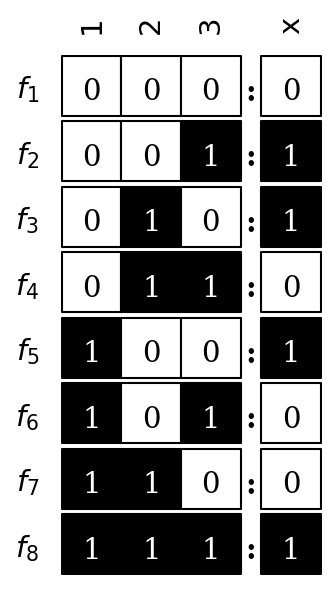

In [8]:
plot_look_up_table(1, parity, save=True)

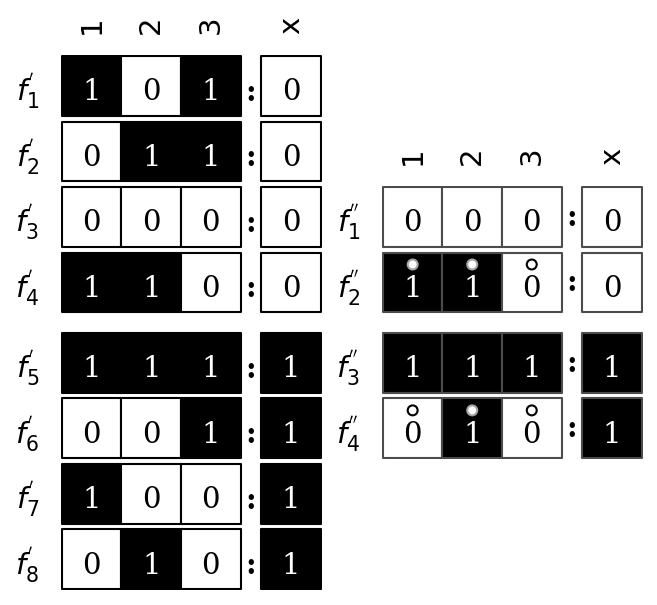

In [9]:
plot_schemata(1, parity, save=True)

Ok so based on this schemata, we expect '14' to show a bunch of unique information. all of the other variables should have some redundancy and some synergy that really should be spread evenly across all three variables because the inputs are permutable.

If we know 14 we know whether or not an ON transition is possible. Otherwise we need to know about at least 2 of the other variables.

In [10]:
lut = parity.look_up_table()
inputs = lut['In:'].values
outputs = lut['Out:'].values
dit_strings = [i + o for i, o in zip(inputs, outputs)]
print(dit_strings)

['0000', '0011', '0101', '0110', '1001', '1010', '1100', '1111']


In [11]:
import dit
dist = dit.Distribution(dit_strings, [1/len(dit_strings)]*len(dit_strings))

In [12]:
pid_wb = dit.pid.PID_WB(dist)

In [13]:
filtered_wb = {}
for key in pid_wb._pis:
    if pid_wb._pis[key] > 0:
        filtered_wb[key] = pid_wb._pis[key]
filtered_wb

{((0, 1, 2),): 1.0}

In [14]:
# slight change to the boolean function
outputs[0] = '1'
wg_mod = cana.boolean_node.BooleanNode.from_output_list(outputs)
wg_mod.input_symmetry()

0.375

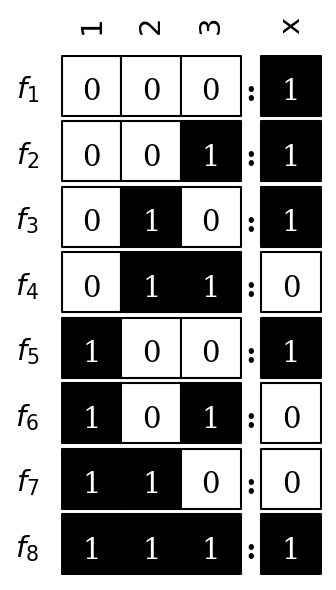

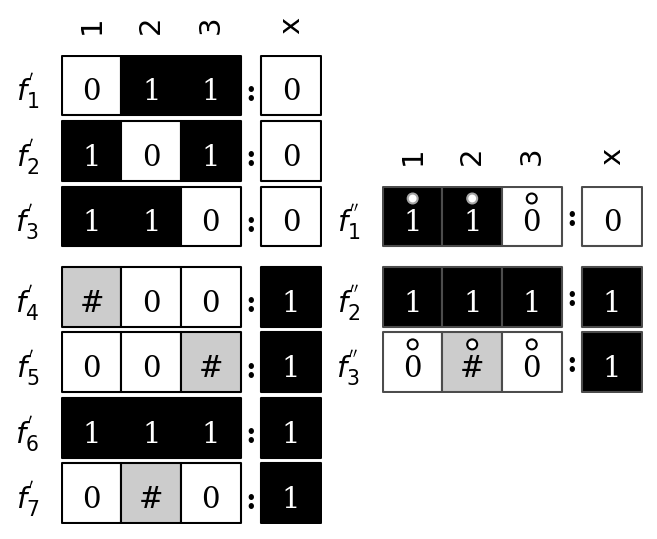

In [15]:
plot_look_up_table(1, wg_mod, save=True)
plot_schemata(1, wg_mod, save=True)

In [27]:
lut = wg_mod.look_up_table()
inputs = lut['In:'].values
outputs = lut['Out:'].values
dit_strings = [i + o for i, o in zip(inputs, outputs)]
print(dit_strings)
dist = dit.Distribution(dit_strings, [1/len(dit_strings)]*len(dit_strings))

['0001', '0011', '0101', '0110', '1001', '1010', '1100', '1111']


In [28]:
pid_wb = dit.pid.PID_WB(dist)
filtered_wb = {}
for key in pid_wb._pis:
    if pid_wb._pis[key] > 0:
        filtered_wb[key] = pid_wb._pis[key]
filtered_wb

{((0,), (1,), (2,)): 0.04879494069539851,
 ((0, 1), (0, 2), (1, 2)): 0.15563906222956642,
 ((0, 1, 2),): 0.75}

In [38]:
# lets set the outputs back to parity
outputs[0] = '0'
# and make some other change
outputs[2] = '0'

parity_mod = cana.boolean_node.BooleanNode.from_output_list(outputs)
parity_mod.input_symmetry()

0.2777777777777778

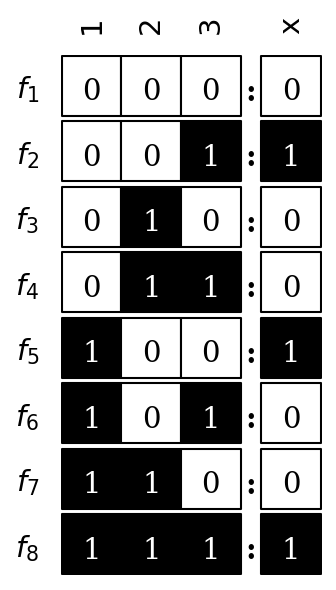

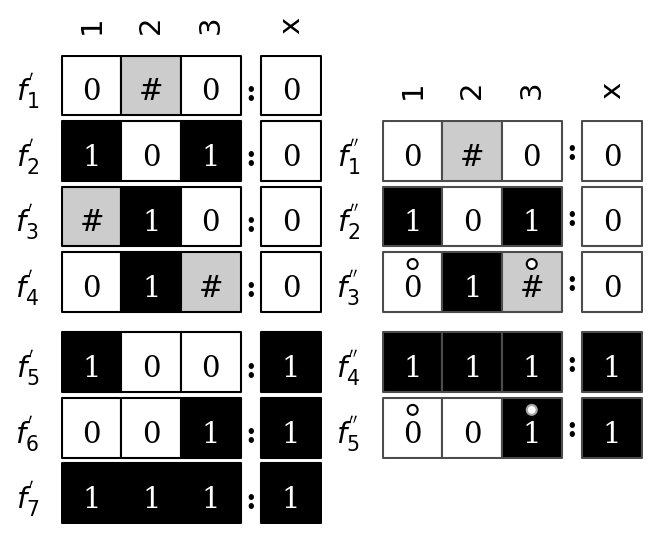

In [39]:
plot_look_up_table(1, parity_mod, save=True)
plot_schemata(1, parity_mod, save=True)

In [31]:
lut = wg_mod.look_up_table()
inputs = lut['In:'].values
outputs = lut['Out:'].values
dit_strings = [i + o for i, o in zip(inputs, outputs)]
print(dit_strings)
dist = dit.Distribution(dit_strings, [1/len(dit_strings)]*len(dit_strings))
pid_wb = dit.pid.PID_WB(dist)
filtered_wb = {}
for key in pid_wb._pis:
    if pid_wb._pis[key] > 0:
        filtered_wb[key] = pid_wb._pis[key]
filtered_wb

['0001', '0011', '0101', '0110', '1001', '1010', '1100', '1111']


{((0,), (1,), (2,)): 0.04879494069539851,
 ((0, 1), (0, 2), (1, 2)): 0.15563906222956642,
 ((0, 1, 2),): 0.75}

In [6]:
# Max redundancy
# 000 001 010 011 100 101 110 111
#  0   1   1   1   1   1   1   1
dec_transitions = ['1', '1', '1', '1', '1', '1', '1', '0']
redun = cana.boolean_node.BooleanNode.from_output_list(dec_transitions[::-1])
redun.input_symmetry()

0.125

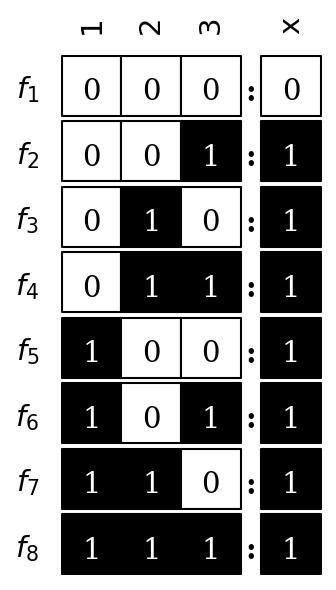

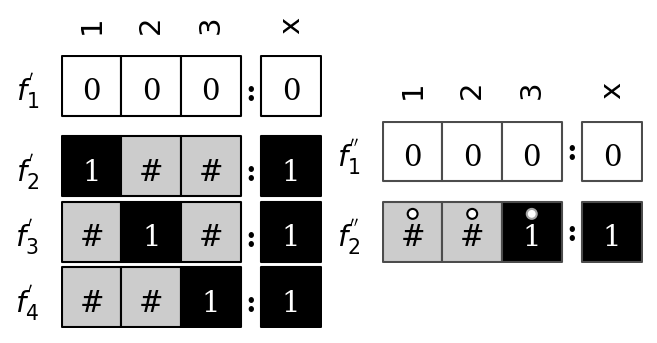

In [7]:
plot_look_up_table(1, redun, save=True)
plot_schemata(1, redun, save=True)

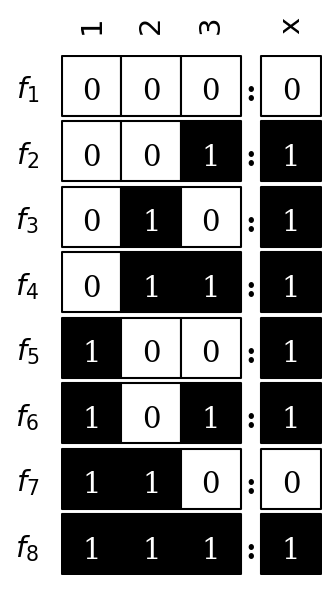

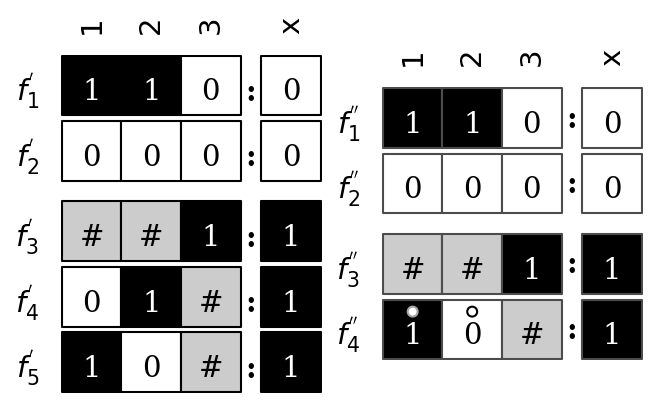

In [11]:
lut = redun.look_up_table()
outputs = lut['Out:'].values

# make some changes to the target distribution
outputs[6] = '0'

mod_redun = cana.boolean_node.BooleanNode.from_output_list(outputs)
mod_redun.input_symmetry()

plot_look_up_table(1, mod_redun, save=True)
plot_schemata(1, mod_redun, save=True)

In [12]:
# unique information
# 000 001 010 011 100 101 110 111
#  0   0   0   0   1   1   1   1
dec_transitions = ['1', '1', '1', '1', '0', '0', '0', '0']
unq = cana.boolean_node.BooleanNode.from_output_list(dec_transitions[::-1])
unq.input_symmetry()

0.2222222222222222

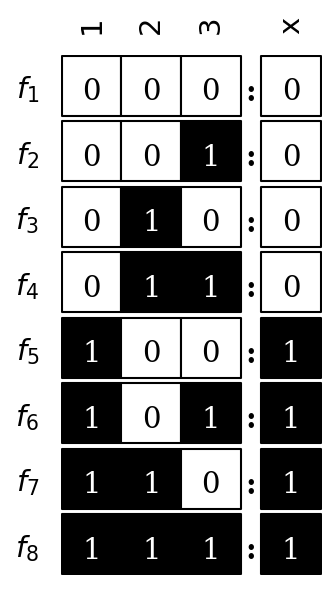

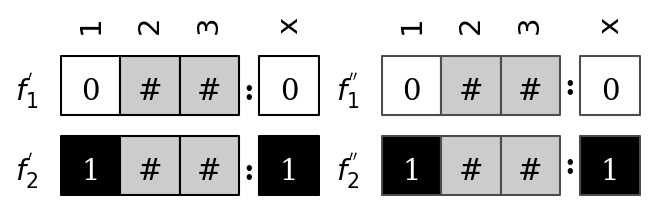

In [13]:
plot_look_up_table(1, unq, save=True)
plot_schemata(1, unq, save=True)

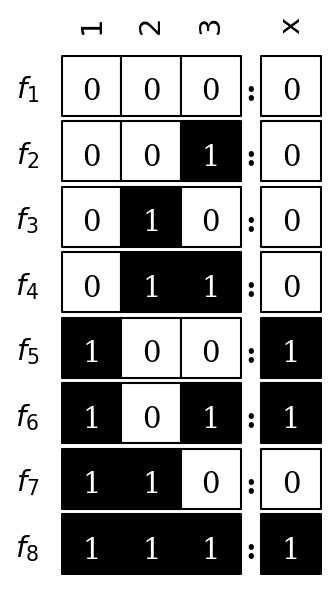

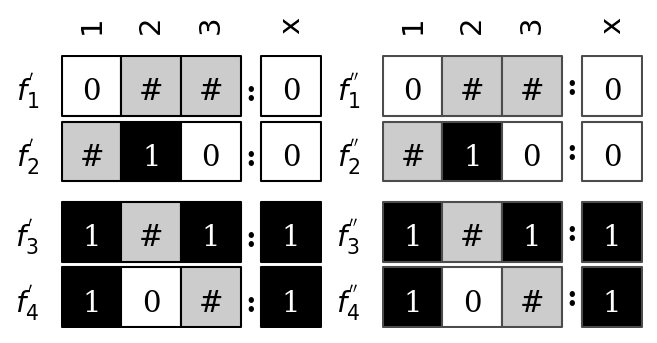

In [14]:
lut = unq.look_up_table()
outputs = lut['Out:'].values

# make some changes to the target distribution
outputs[6] = '0'

mod_unq = cana.boolean_node.BooleanNode.from_output_list(outputs)
mod_unq.input_symmetry()

plot_look_up_table(1, mod_unq, save=True)
plot_schemata(1, mod_unq, save=True)